## 1. Exploring the dataset [EDA]

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Uploading the dataset

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking the shape

bike.shape

(730, 16)

In [4]:
#Checking for any missing values/erroneous data

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


-- We can infer that there are no missing values in the data.

In [5]:
# Describe the data

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Because cnt is our dependent variable, 'casual' and 'registered' are redundant columns. We need to drop the same.
bike.drop(['casual', 'registered','instant','dteday'], inplace=True, axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


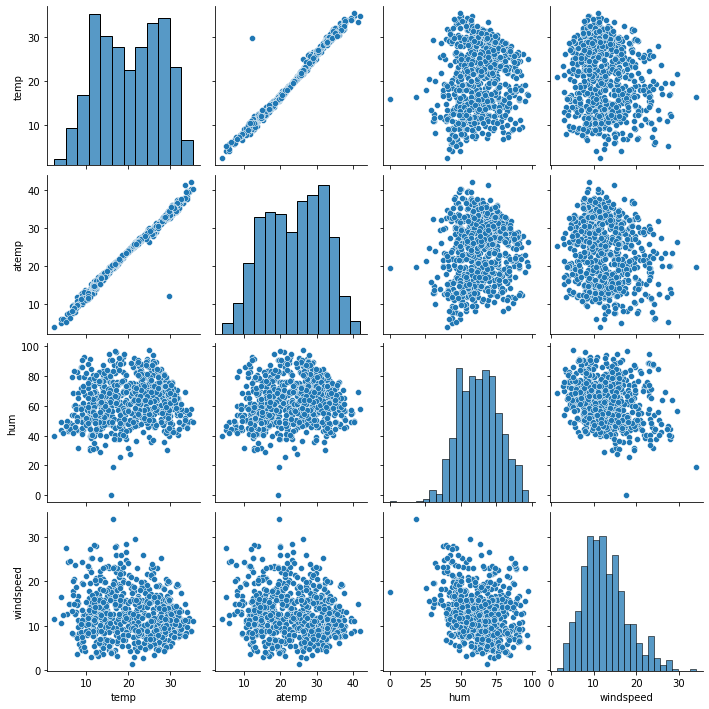

In [35]:
#Visualize the data to check multicollinearity
sns.pairplot(data=bike, vars=['temp', 'atemp', 'hum','windspeed'])
plt.show()

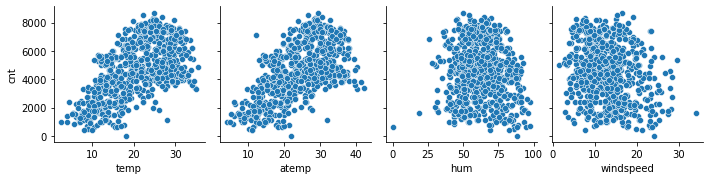

In [7]:
#Visualizing the data using pairplot for numeric variables
sns.pairplot(data=bike,x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt')
plt.show()

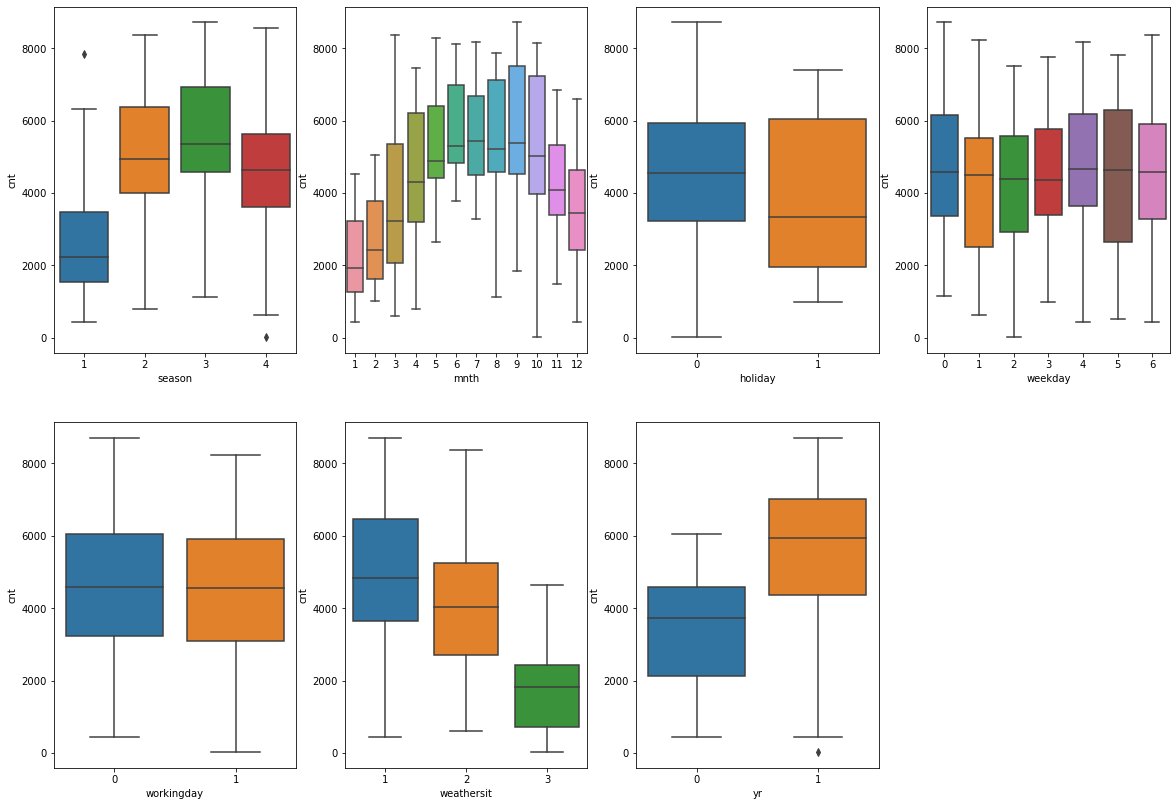

In [8]:
#Visualizing the data using boxplots for categorical variables

plt.figure(figsize=(20, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)

plt.show()

#### Inferences:
- The bike demand is significantly high on Summer and Fall, and when there are no holidays.
- The bike demand on total was more in 2019 compared to 2018, implying an increase in customer base.
- Clear, Few clouds, Partly cloudy, Partly cloudy weather has the maximum count followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist weather. Also, during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, no one supposedly use the bikes.

In [9]:
# Converting some numerical variables into categorical to gain better insights and meaning from the data

#Season

bike['season'] = bike['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

#Weekday

bike['weekday'] = bike['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})


#Weathersit

bike['weathersit'] = bike['weathersit'].map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

#mnth
bike['mnth'] = bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#Creating dummy variables for season, mnth, weekday, weathersit

d = bike[['season','mnth','weekday','weathersit']]
d = pd.get_dummies(d,drop_first=True )

In [12]:
#Concatenating dummy variables to the actual dataset and displaying the same & dropping the columns out of which dummy variables were created.

bike = pd.concat([d,bike],axis = 1)
bike.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


## 2. Creating a model & training it

In [13]:
#Split the data into training and testing set (7:3).

bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
#Rescaling the training dataset to build a model. Since dummy variables are already between 0 & 1, scaling would be done to the variables except the dummy ones.

scaling = MinMaxScaler()

num_vars = ['cnt','temp','atemp','hum','windspeed']
bike_train[num_vars] = scaling.fit_transform(bike_train[num_vars])
bike_train.head()


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


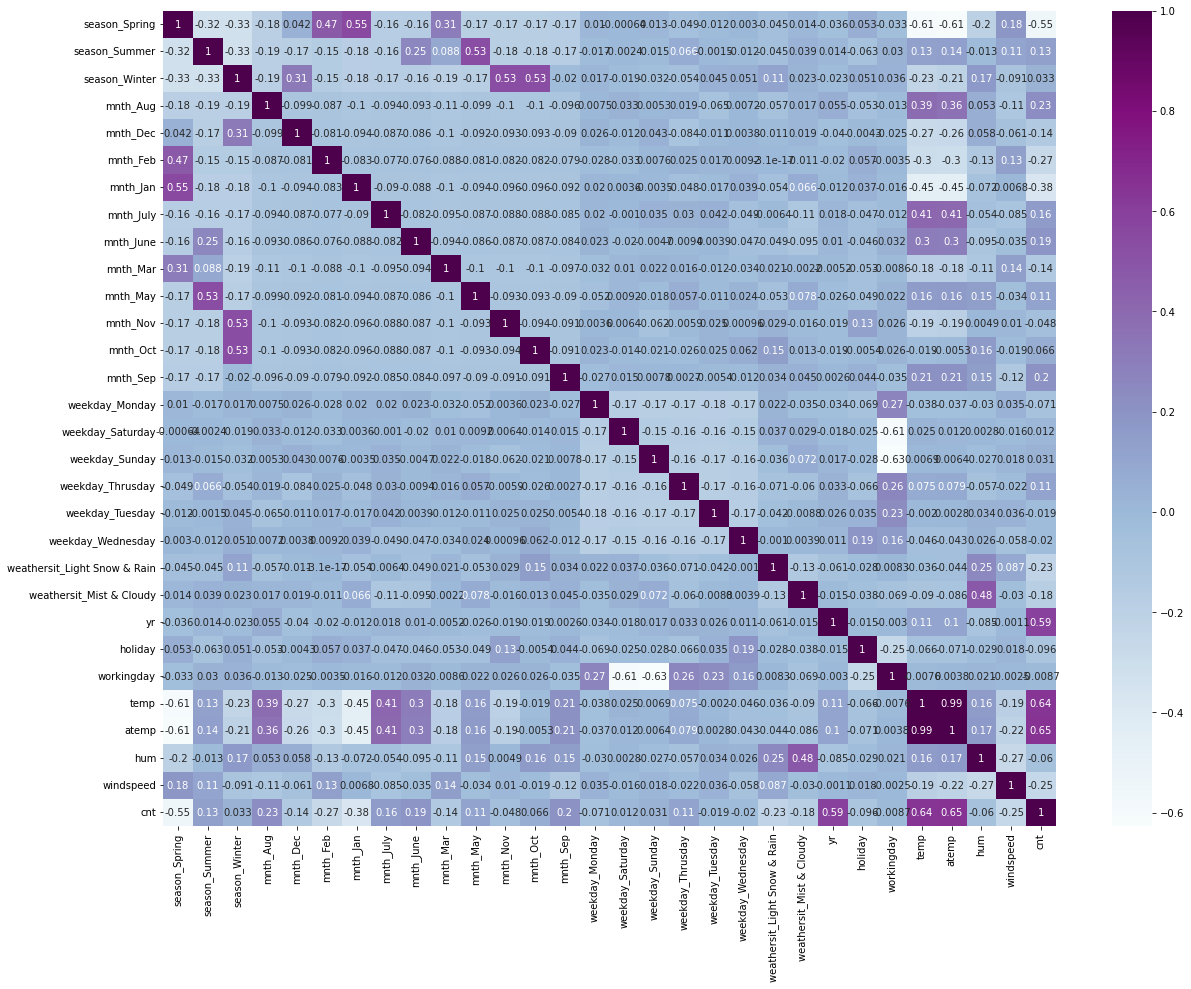

In [15]:
#Building the correlation matrix to check the variables highly correlated to 'cnt'.

plt.figure(figsize = (20, 15))
sns.heatmap(bike_train.corr(), annot = True, cmap="BuPu")
plt.show()

In [16]:
#Dividing the training data into x and Y to build the model
y_train = bike_train.pop('cnt')
X_train = bike_train

In [17]:
#We are going to use statsmodel to build the model but if we don't add a constant, statsmodel would build a line passing through origin which is not wanted.
lm = LinearRegression()
lm.fit(X_train, y_train)

#RFE for 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

#Print columns produced by RFE that can be used for elimination in the future.
col = X_train.columns[rfe.support_]
col


Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [18]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [19]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [20]:
#Build a model with all variables
X_train_rfe = sm.add_constant(X_train_rfe)

#Create the model
lr = sm.OLS(y_train,X_train_rfe)

#Fit the model
lr_model = lr.fit()

#Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          3.34e-189
Time:                        11:19:02   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3202      0.036      8.886      0.000       0.249       0.391
season_Spring                   -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer                    0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter                    0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec                        -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan                        -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                       -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov                        -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep                         0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light Snow & Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist & Cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
yr                               0.2303      0.008     28.511      0.000       0.214       0.246
holiday                         -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                             0.4800      0.037     12.977      0.000       0.407       0.553
hum                             -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                       -0.1885      0.026     -7.312      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We see that we are able to explain almost 85% of the data using this model which is pretty good. Now we need to check the VIF values of the independent variables.

In [21]:
#VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variables,VIF
0,const,82.48
1,season_Spring,5.27
13,temp,4.42
3,season_Winter,3.83
2,season_Summer,2.76
14,hum,1.93
7,mnth_Nov,1.76
5,mnth_Jan,1.68
10,weathersit_Mist & Cloudy,1.57
4,mnth_Dec,1.49


In [22]:
#We see that the VIF values of the constant is too high implying it must be removed from the model. [A VIF <=5 is ideally accepted.]
X_train_1 = X_train_rfe.drop(['const'], axis=1)

In [23]:
#Check the VIF of the model hence formed
vif = pd.DataFrame()
X = X_train_1
vif['Variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variables,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
0,season_Spring,4.37
2,season_Winter,4.06
1,season_Summer,2.81
9,weathersit_Mist & Cloudy,2.32
10,yr,2.09
6,mnth_Nov,1.83
4,mnth_Jan,1.75


In [24]:
#We see in the new model, humidity and temp has a high VIF value. However, we shall only drop the hum first to see the impact on the model.
X_train_1 = X_train_1.drop(['hum'], axis=1)

In [25]:
## NEXT MODEL (FINAL)

# Adding a constant variable 
X_train_2 = sm.add_constant(X_train_1)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_2).fit()   

# Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          1.57e-186
Time:                        11:19:02   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2466      0.032      7.679      0.000       0.184       0.310
season_Spring                   -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer                    0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter                    0.0887      0.018      4.951      0.000       0.053       0.124
mnth_Dec                        -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan                        -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July                       -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov                        -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep                         0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Light Snow & Rain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Mist & Cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
yr                               0.2343      0.008     28.709      0.000       0.218       0.250
holiday                         -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                             0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                       -0.1586      0.025     -6.290      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R-squared value being very high implies the final model can describe 97% of the data!

In [26]:
# Calculate the VIF for the new model again

vif = pd.DataFrame()
X = X_train_1
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_July,1.59
9,weathersit_Mist & Cloudy,1.56


## 3. Residual analysis

We shall now plot the histogram of error terms in order to check whether it is normally distributed, which is one of the important assumptions of linear regression.

In [27]:
y_train_2 = lm.predict(X_train_2)

Text(0.5, 0, 'Error')

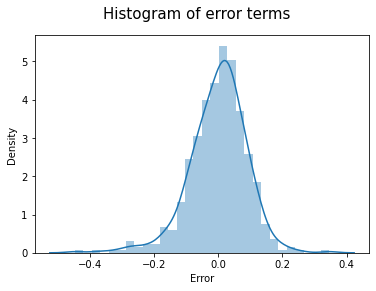

In [28]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_2), bins = 30)
# Plot heading 
fig.suptitle('Histogram of error terms', fontsize = 15)  
# X-label
plt.xlabel('Error', fontsize = 10)                         

Inference: The error terms are in a good histogram shape in normal distribution.

## 4. Predicting using the final model and the test set

In [29]:
#Scaling the terms on test set

var = ['cnt','hum','windspeed','temp','atemp']
bike_test[var] = scaling.transform(bike_test[var])
bike_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.214503,0.687342,1.809432,0.226998,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.079240,0.266307,0.439359,0.130866,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.040780,0.067625,0.698771,-0.064404,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.145234,0.457270,1.481350,0.133043,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.214418,0.707150,1.777667,0.215632,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.282370,0.908736,2.120341,0.300387,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.358772,1.234827,2.881888,0.631282,0.963300


In [30]:
# Splitting the test set
y_test = bike_test.pop('cnt')
X_test = bike_test

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [31]:
# Setting the test set for prediction

test_col = X_train_2.columns
X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Jan                      219 non-null    uint8  
 6   mnth_July                     219 non-null    uint8  
 7   mnth_Nov                      219 non-null    uint8  
 8   mnth_Sep                      219 non-null    uint8  
 9   weathersit_Light Snow & Rain  219 non-null    uint8  
 10  weathersit_Mist & Cloudy      219 non-null    uint8  
 11  yr                            219 non-null    int64  
 12  holiday                       219 non-null    int64  
 13  temp

In [32]:
# Making predictions using the final model

y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

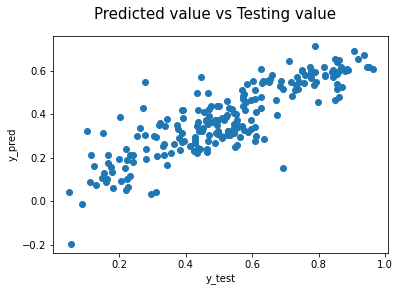

In [33]:
#Plotting the graph for actual vs predicted values

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Predicted value vs Testing value', fontsize = 15)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)      

In [34]:
#Check for the coefficients of the independent variables for the model.

param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient',ascending = False,inplace = True)
param

,Variables,Coefficient
index,,
13,temp,0.437655
0,const,0.246635
11,yr,0.234287
3,season_Winter,0.088652
8,mnth_Sep,0.068219
2,season_Summer,0.033271
7,mnth_Nov,-0.041852
4,mnth_Dec,-0.044529
5,mnth_Jan,-0.050270


## 5. Conclusion:

- The equation of our best fitted line is with an R-squared value of 84%: 

$
cnt = 0.2466 + 0.4376*temp + 0.2342*yr + 0.0886*Winter + 0.0332*Summer + 0.0682*September + 0.05*Spring - 0.002*Dec -0.041*Nov - 0.0502*Jan - 0.0503*July - 0.0814*Cloudy - 0.0919*Holiday - 0.1585*Windspeed -0.2928*Rain $

- The positive coefficients imply the factors which, on increasing, would lead to the increase in count and the negative coefficients imply that the factors with negative coeff. on increase, would lead to the decrease in total count.

 > By looking at the equation, we can imply that temperature is a major deciding factor of the count followed by the year and season (Winter and summer), where the curve is with positive coefficient.
 
 > The rental count drops during holidays and fall season
 


# Assignment based subjective questions:

1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? 

Ans. season, yr, mnth, holiday, weekday, weathersit are categorical variables in the dataset. From the analysis, it can be inferred that
- Fall is the season to get maximum active customers (September being the month). 2019 observed more sale than 2018.
- Holidays affect the active count which drops.
- During heavy rain, there are no users whereas partly cloudy/clear sky saw the maximum count.


2. Why is it important to use drop_first=True during dummy variable creation?

Ans. Not using drop_first=True would make the dummy variables correlated to each other and hence, redundant, which is not expected of our analysis.

3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?

Ans. _atemp_ and _temp_ has the highest correlation with the target variable, as is evident from the pair plot in ln[35] .

4. How did you validate the assumptions of Linear Regression after building the model on the training set?

Ans. One of the fundamental assumptions of a linear regression model is that the error terms should correspond to a normal curve, when plotted on histogram. On Out[28], we spotted the same. Hence, this assumption is validated.

5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?

Ans. The top 3 features directly influencing the count are the features with highest coefficients. These are: Temp, Year (positively influencing) and snowy and rainy weather (negatively influencing).



# General subjective questions:

1. Explain the linear regression algorithm in detail.

Ans. An interpolation technique used to predict correlation between variables and how an independent variable is influenced by the dependent variable(s), is linear regression.
After looking into the data and cleaning it with exploratory data analysis, we split the dataset into training set (which would be used to train a model) and the testing set (which would be used to check how close is our model to the actual output). After checking the collinearity of variables and using the requisite variables to train the model and checking the R-value of the model and the p-values of dependent variables, after dealing/dropping the necessary columns and reiterating the steps (feature elimination), we come to a final model.
According to the conditions of linear regression which states that the error curve must be a normal one, we proceed to testing the model with the test dataset. The conclusion hence drawn on the model would be used to provide valuable insights/predictions on datapoints in the range of the model.

2. Explain the Anscombe’s quartet in detail.

Ans. A regression model is not always necessarily an exact one, it can also be fooled by some (smart) data! In certain cases, there are multiple datasets which are completely different but after training, the regression model looks the same. A group of four such datasets having identical descriptive statistics but with some peculiarities, is the Anscombe's quartet.

3. What is Pearson’s R?

Ans. Pearson's correlation coefficient, also known as Pearson's R, is a measure of the strength of correlation between two variables. It is commonly used in linear regression. The value of Pearson's R always lie between -1 and +1, the latter indicating a perfectly positive and linear correlation and the former indicating a perfectly linear negative regression. The values in between denotes the relative collinearity of two variables.

4. What is scaling? Why is scaling performed? What is the difference between normalized scaling and standardized scaling?

Ans. Scaling is necessary for a model to be functional with the appropriate range of coefficients. For e.g., if there were two independent variables named price and months on which the sale of car depended, the price range would be far too high because there are only 12 months in a year. In that case, scaling the variable price appropriately won't allow decimal errors to happen in the model. There are two types of scaling:
- Normalized scaling: This scaling is done to make the distribution of data into a Gaussian one. It doesn't have a preset range. Typically used in Neural networks broadly.
- Standardized scaling: The example given above is of standardized scaling. Here, the values of variable(s) is/are compressed into a specific range to suit the model.

5. You might have observed that sometimes the value of VIF is infinite. Why does this happen?

Ans. If there is a perfect correlation between the dependent variable and independent variable(s), the R-squared value comes out to be 1. Hence VIF, which is (1/(1-R^2)) turns out to approach infinity.

6. What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression.

Ans. Q-Q plot is a graphical tool to assess if sets of data come from the same statistical distribution. It is particularly helpful in linear regression when we are given testing and training datasets differently. In this scenario, it becomes important to check whether both the data comes from the same background, in order to maintain the sanity of the model.
